In [1]:
import pandas as pd
comp_df1 = pd.read_csv("DATA/importance_scores_BIPOLAR_RWR.tsv", sep='\t')
comp_df2 = pd.read_csv("DATA/importance_scores_unweighted_complete.tsv", sep='\t')

In [2]:
merged_df = pd.merge(comp_df1, comp_df2, on="claim_name", suffixes=('_df1', '_df2'))
merged_df

,index,score_df1,claim_name,ncbi_gene_id_df1,ncbi_gene_id_df2,score_df2
0,97,0.003570,CYP1A2,1544,1544,0.003217
1,85,0.003567,CYP3A4,1576,1576,0.006399
2,0,0.003240,CYP2D6,1565,1565,0.003171
3,31,0.002708,DRD2,1813,1813,0.000481
4,47,0.002567,CYP2C9,1559,1559,0.002273
...,...,...,...,...,...,...
4346,3171,0.000168,GGPS1,9453,9453,0.000166
4347,3172,0.000168,SLC6A15,55117,55117,0.000172
4348,3173,0.000168,CYTH2,9266,9266,0.000170
4349,3174,0.000168,HNRNPA1,3178,3178,0.000168


In [3]:
merged_df['score_ratio'] = merged_df['score_df1'] / merged_df['score_df2'].replace(0, float('nan'))
merged_df

,index,score_df1,claim_name,ncbi_gene_id_df1,ncbi_gene_id_df2,score_df2,score_ratio
0,97,0.003570,CYP1A2,1544,1544,0.003217,1.109870
1,85,0.003567,CYP3A4,1576,1576,0.006399,0.557392
2,0,0.003240,CYP2D6,1565,1565,0.003171,1.022052
3,31,0.002708,DRD2,1813,1813,0.000481,5.627148
4,47,0.002567,CYP2C9,1559,1559,0.002273,1.129147
...,...,...,...,...,...,...,...
4346,3171,0.000168,GGPS1,9453,9453,0.000166,1.010676
4347,3172,0.000168,SLC6A15,55117,55117,0.000172,0.972817
4348,3173,0.000168,CYTH2,9266,9266,0.000170,0.984173
4349,3174,0.000168,HNRNPA1,3178,3178,0.000168,0.995570


In [5]:
sorted_df = merged_df.sort_values(by='score_ratio', ascending=False)  # descending
sorted_df

,index,score_df1,claim_name,ncbi_gene_id_df1,ncbi_gene_id_df2,score_df2,score_ratio
8,463,0.002483,HTR2C,3358,3358,0.000244,10.165259
17,2973,0.001744,EPM2A,7957,7957,0.000177,9.831490
19,935,0.001692,RABEP1,9135,9135,0.000179,9.447987
18,934,0.001692,SH2B1,25970,25970,0.000179,9.429608
13,393,0.001973,MTHFR,4524,4524,0.000236,8.341148
...,...,...,...,...,...,...,...
1738,200,0.000168,HSD17B10,3028,3028,0.002203,0.076053
1648,52,0.000168,KDM4A,9682,9682,0.002290,0.073176
1529,109,0.000168,VDR,7421,7421,0.003294,0.050867
86,162,0.000899,AR,367,367,0.028428,0.031627


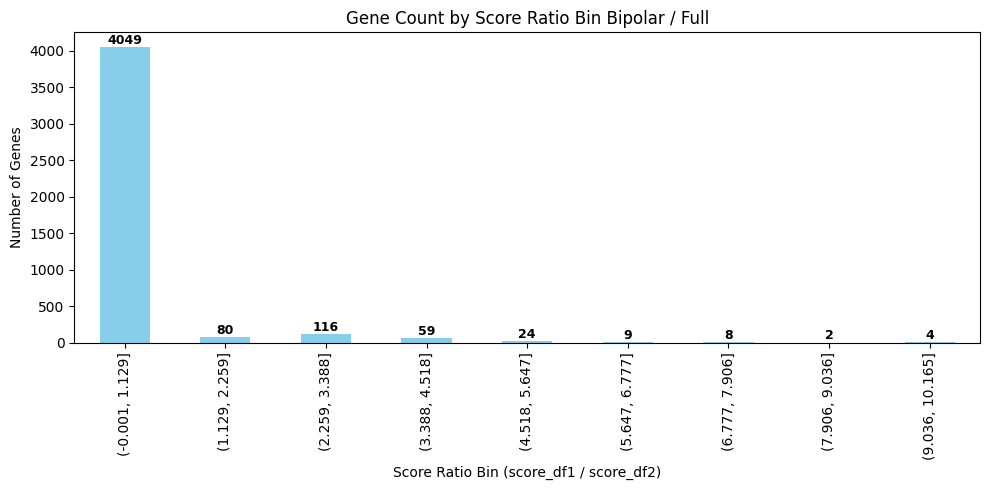

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Bin the score ratios
bins = np.linspace(0, merged_df['score_ratio'].max(), 10)
merged_df['score_ratio_bin'] = pd.cut(merged_df['score_ratio'], bins=bins, include_lowest=True)

# Count number of genes in each bin
bin_counts = merged_df['score_ratio_bin'].value_counts().sort_index()

# Plot
ax = bin_counts.plot(
    kind='bar',
    color='skyblue',
    figsize=(10, 5)
)

# Annotate each bar with the count
for idx, count in enumerate(bin_counts):
    ax.text(
        idx, count + 1, str(count),  # Slightly above the bar
        ha='center', va='bottom',
        fontsize=9, fontweight='bold'
    )

plt.ylabel('Number of Genes')
plt.xlabel('Score Ratio Bin (score_df1 / score_df2)')
plt.title('Gene Count by Score Ratio Bin Bipolar / Full')
plt.tight_layout()
plt.show()


In [9]:
sorted_df.to_csv("bipolar_AND_full.csv")